In [2]:
import os
import pickle
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy as np
import obspy
from obspy.clients.fdsn.client import Client 
import obspy
import pandas as pd
import scipy.ndimage
import geopy.distance
import random
client = Client('IRIS')
import scipy
import seaborn as sn
from geopy.distance import geodesic

In [18]:
file_path = 'classifications/J51C.pickle'
with open(file_path,'rb') as handle:
    classifications_raw = pickle.load(handle)

classifications1 = [c for c in classifications_raw if len(c)>1]
classifications = [c for c in classifications1 if c[2]>1]


21039


[]

In [13]:
threshold = 0
tremor = [c for c in classifications if c[4]>threshold]

In [9]:
len(tremor)

0

2015-06-03T09:29:24.066915Z
2
141.44441370949306
classifications/G18D.pickle


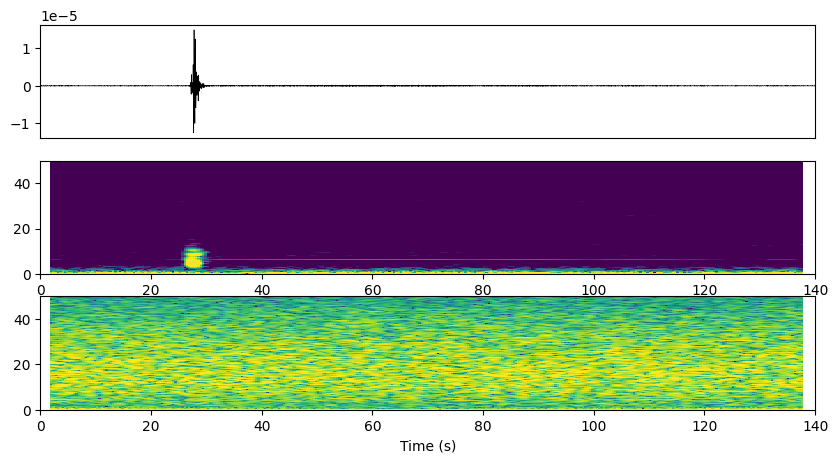

In [6]:
%matplotlib inline
# Another option = Going through the whole day 15 minutes at a time

for tr in tremor:
    
    t1 = tr[0][0]
    t2 = tr[0][1]
    
    print(t1)
    print(tr[2])
    print(tr[4])
    print(file_path)

    # try:
    fig, ax = plt.subplots(3,figsize=(10,5))
    # Waveform- filtered
    st1 = client.get_waveforms("7D", "G18D", "*", "HH2", t1-35, t2+35,attach_response=True);
    st1.filter('bandpass',freqmin=3,freqmax=10)
    st1.remove_response()
    st1.trim(starttime=t1-30,endtime=t2+30)
    ax[0].plot(st1[0].data,'k',linewidth=0.5)
    ax[0].set_xlim(0,len(st1[0].data))
    ax[0].set_xticks([])
    #st1.plot(axes=ax[0]);

    # Spectrogram- unfiltered
    st2 = client.get_waveforms("7D", "G18D", "*", "HH2", t1-35, t2+35);
    st2.trim(starttime=t1-30,endtime=t2+30)
    st2[0].spectrogram(axes=ax[1],wlen=5,dbscale=True)
    ax[1].images[0].set_clim(0,30)
    mappable = ax[1].images[0]
    # plt.colorbar(mappable=mappable)
    ax[1].set_ylim([0,50])
    ax[1].set_xlabel('Time (s)')
    
    # Spectrogram- unfiltered
    st2 = client.get_waveforms("7D", "G18D", "*", "HDH", t1-35, t2+35);
    st2.trim(starttime=t1-30,endtime=t2+30)
    st2[0].spectrogram(axes=ax[2],wlen=5,dbscale=True)
    ax[2].images[0].set_clim(0,50)
    mappable = ax[2].images[0]
    # plt.colorbar(mappable=mappable)
    ax[2].set_ylim([0,50])
    ax[2].set_xlabel('Time (s)')
    
    plt.show()
    
    # except:
    #     continue